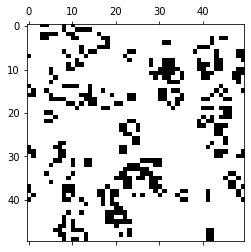

In [44]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from IPython.display import HTML


#found some help online since I've never used matlplotlib for the game of life
# I had a longer version, but I think this one is by far the most elegant one and is easy to understand

#creation of the grid
grid_size = 50
probabilities = [.5,.5]
is_alive = [255,0]
grid = np.random.choice(is_alive, grid_size**2, p=probabilities).reshape(grid_size, grid_size)

#could not find a simpler way to get rid of the global even by adding a function for the grid as it would mess up the animation
def update(data, grid_length=len(grid)):
  #iterative process to check the conditon each iteration with the animation
  global grid

  newGrid = grid.copy()
  for rows in range(grid_length):
    for cols in range(grid_length):
      total = (grid[rows, (cols-1)%grid_length] + grid[rows, (cols+1)%grid_length] + 
               grid[(rows-1)%grid_length, cols] + grid[(rows+1)%grid_length, cols] + 
               grid[(rows-1)%grid_length, (cols-1)%grid_length] + grid[(rows-1)%grid_length, (cols+1)%grid_length] + 
               grid[(rows+1)%grid_length, (cols-1)%grid_length] + grid[(rows+1)%grid_length, (cols+1)%grid_length])/255
      if grid[rows, cols]  == 255:
        if (total < 2) or (total > 3):
          newGrid[rows, cols] = 0
      else:
        if total == 3:
          newGrid[rows, cols] = 255
  #creating the upadted grid and sending it as an image
  mat.set_data(newGrid)
  grid = newGrid
  return [mat]

#cannot be put in the function because of update
fig, ax = plt.subplots()
mat = ax.matshow(grid, cmap = 'binary')
#where the magic happens, take the argument of the figure and use the update function to create a GIF
ani = animation.FuncAnimation(fig, update,
                                  frames=10,
                                  save_count=50, blit= True)
HTML(ani.to_html5_video())